Dataset Link : https://universe.roboflow.com/le-quy-don-high-school-for-gifted-students-gfeop/abnormal-activities-u130g

In [ ]:
print('Tesla T4-GPU')

Tesla T4-GPU


In [ ]:
!nvidia-smi

Wed Dec 18 19:42:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="GpxdaRKmGXVQtV3V21ts")
project = rf.workspace("le-quy-don-high-school-for-gifted-students-gfeop").project("abnormal-activities-u130g")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Abnormal-Activities-1 in yolov8:: 100%|██████████| 19090/19090 [00:02<00:00, 6494.69it/s]


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 22.2 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
dataset.location

'/content/Abnormal-Activities-1'

Train the YOLO model

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8m.pt" epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 235MB/s]
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Abnormal-Activities-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

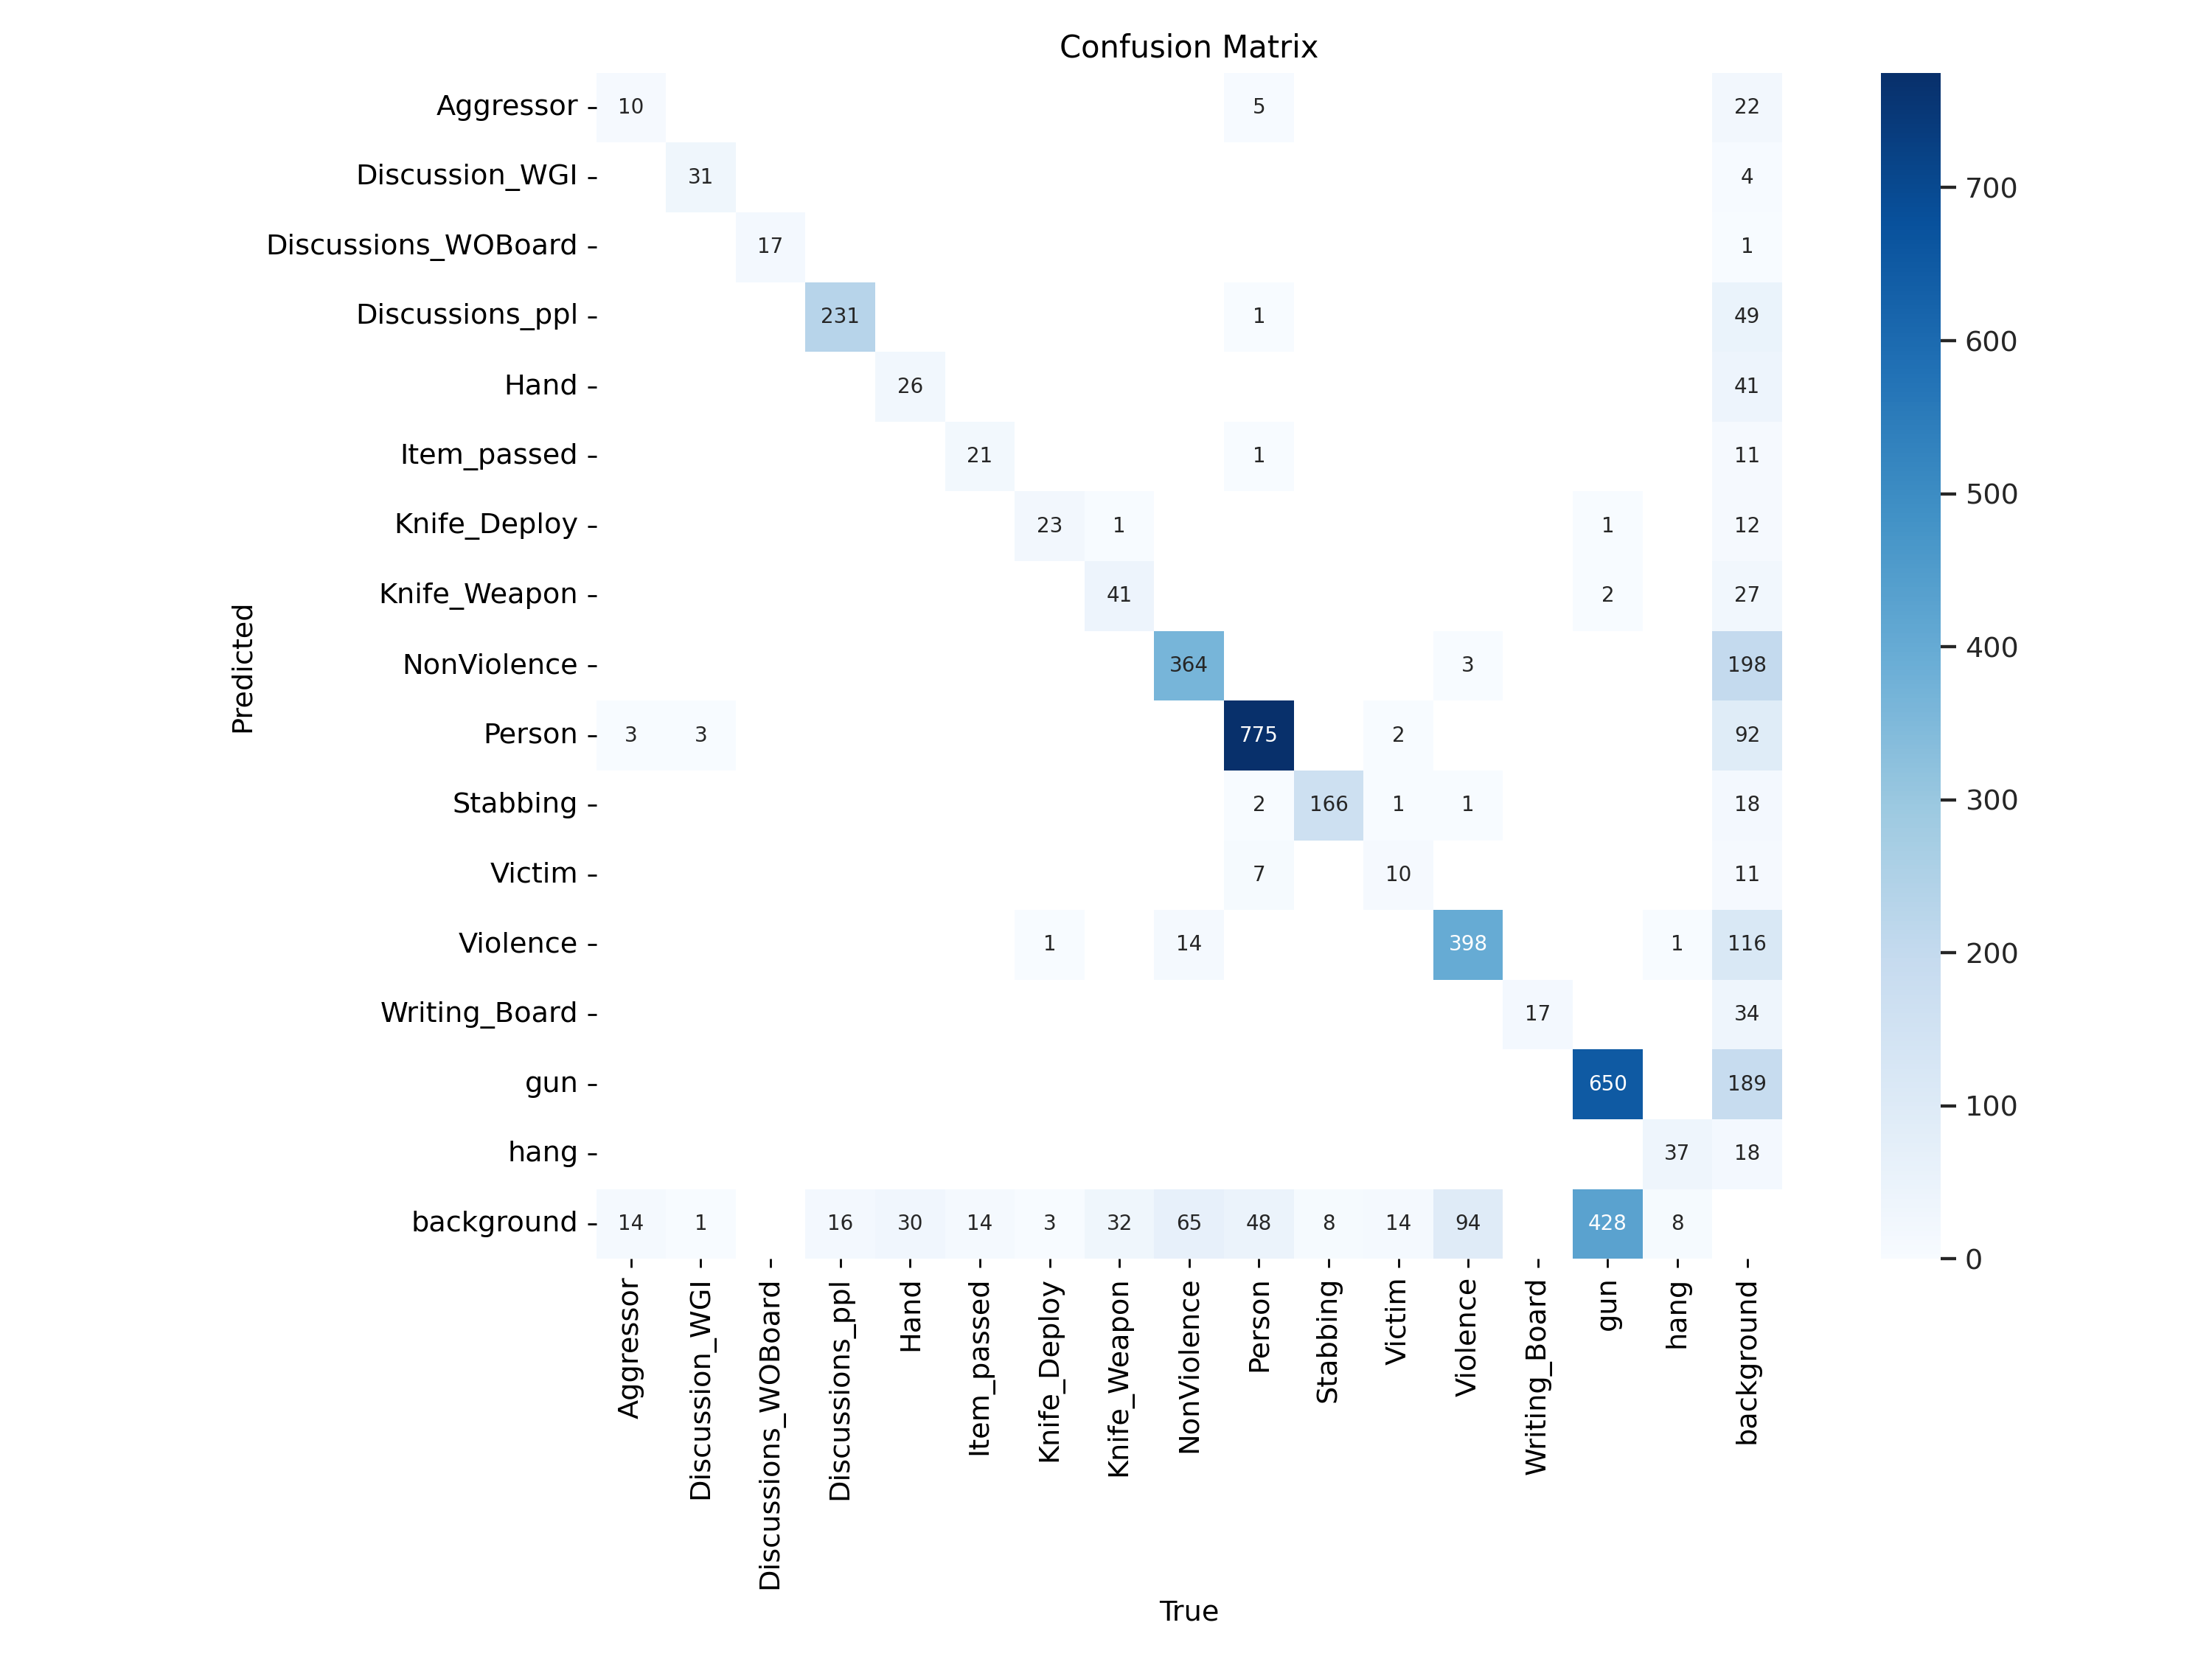

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width = 600)

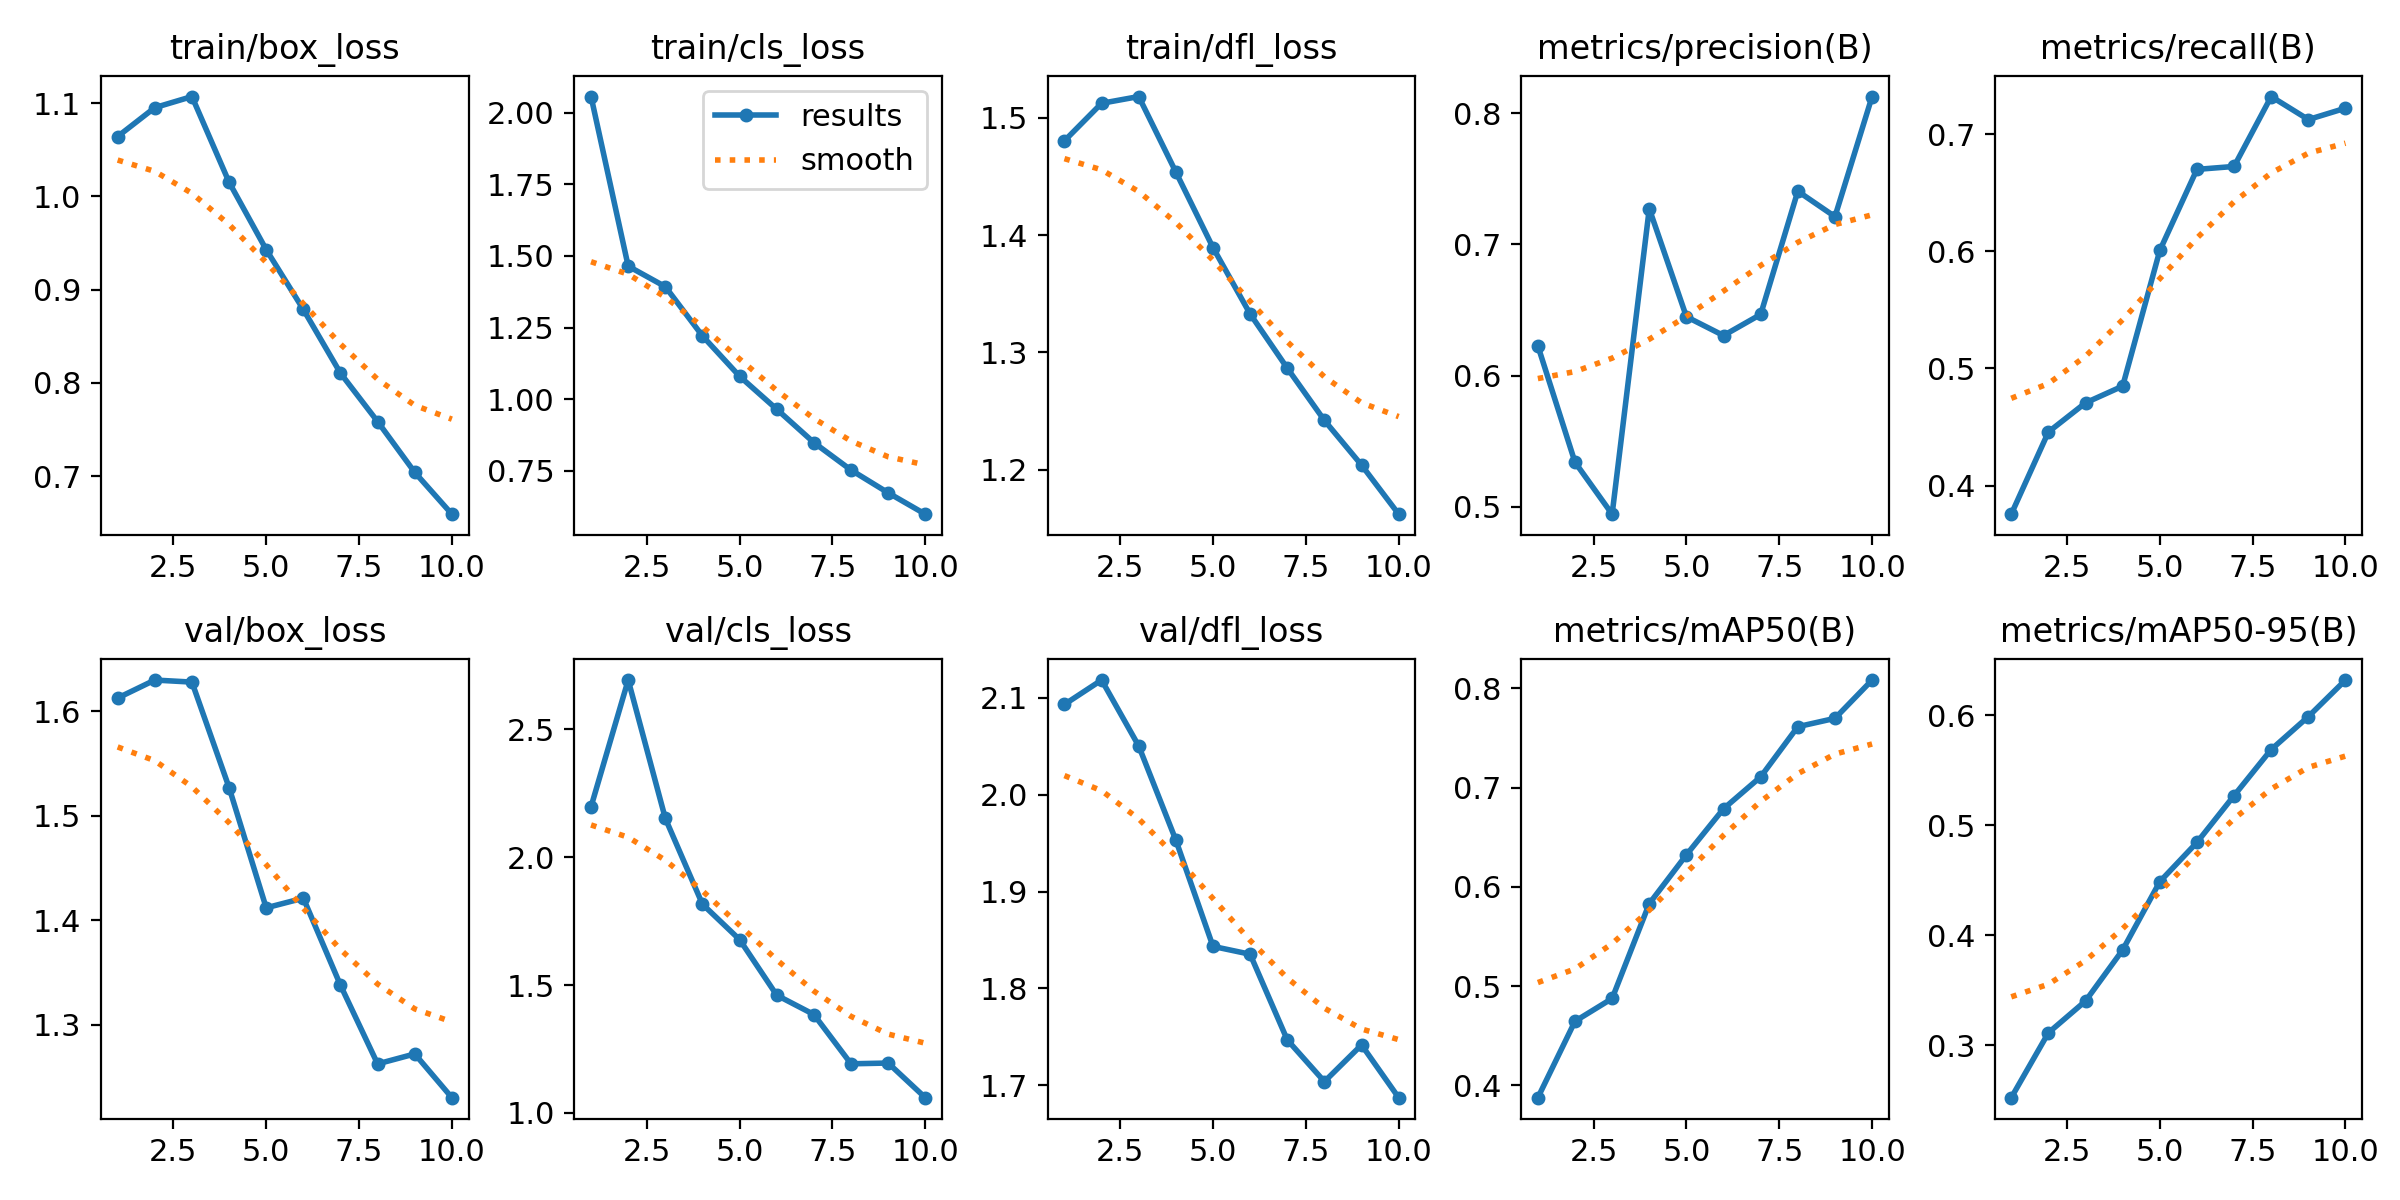

In [ ]:
Image("/content/runs/detect/train/results.png",width = 600)

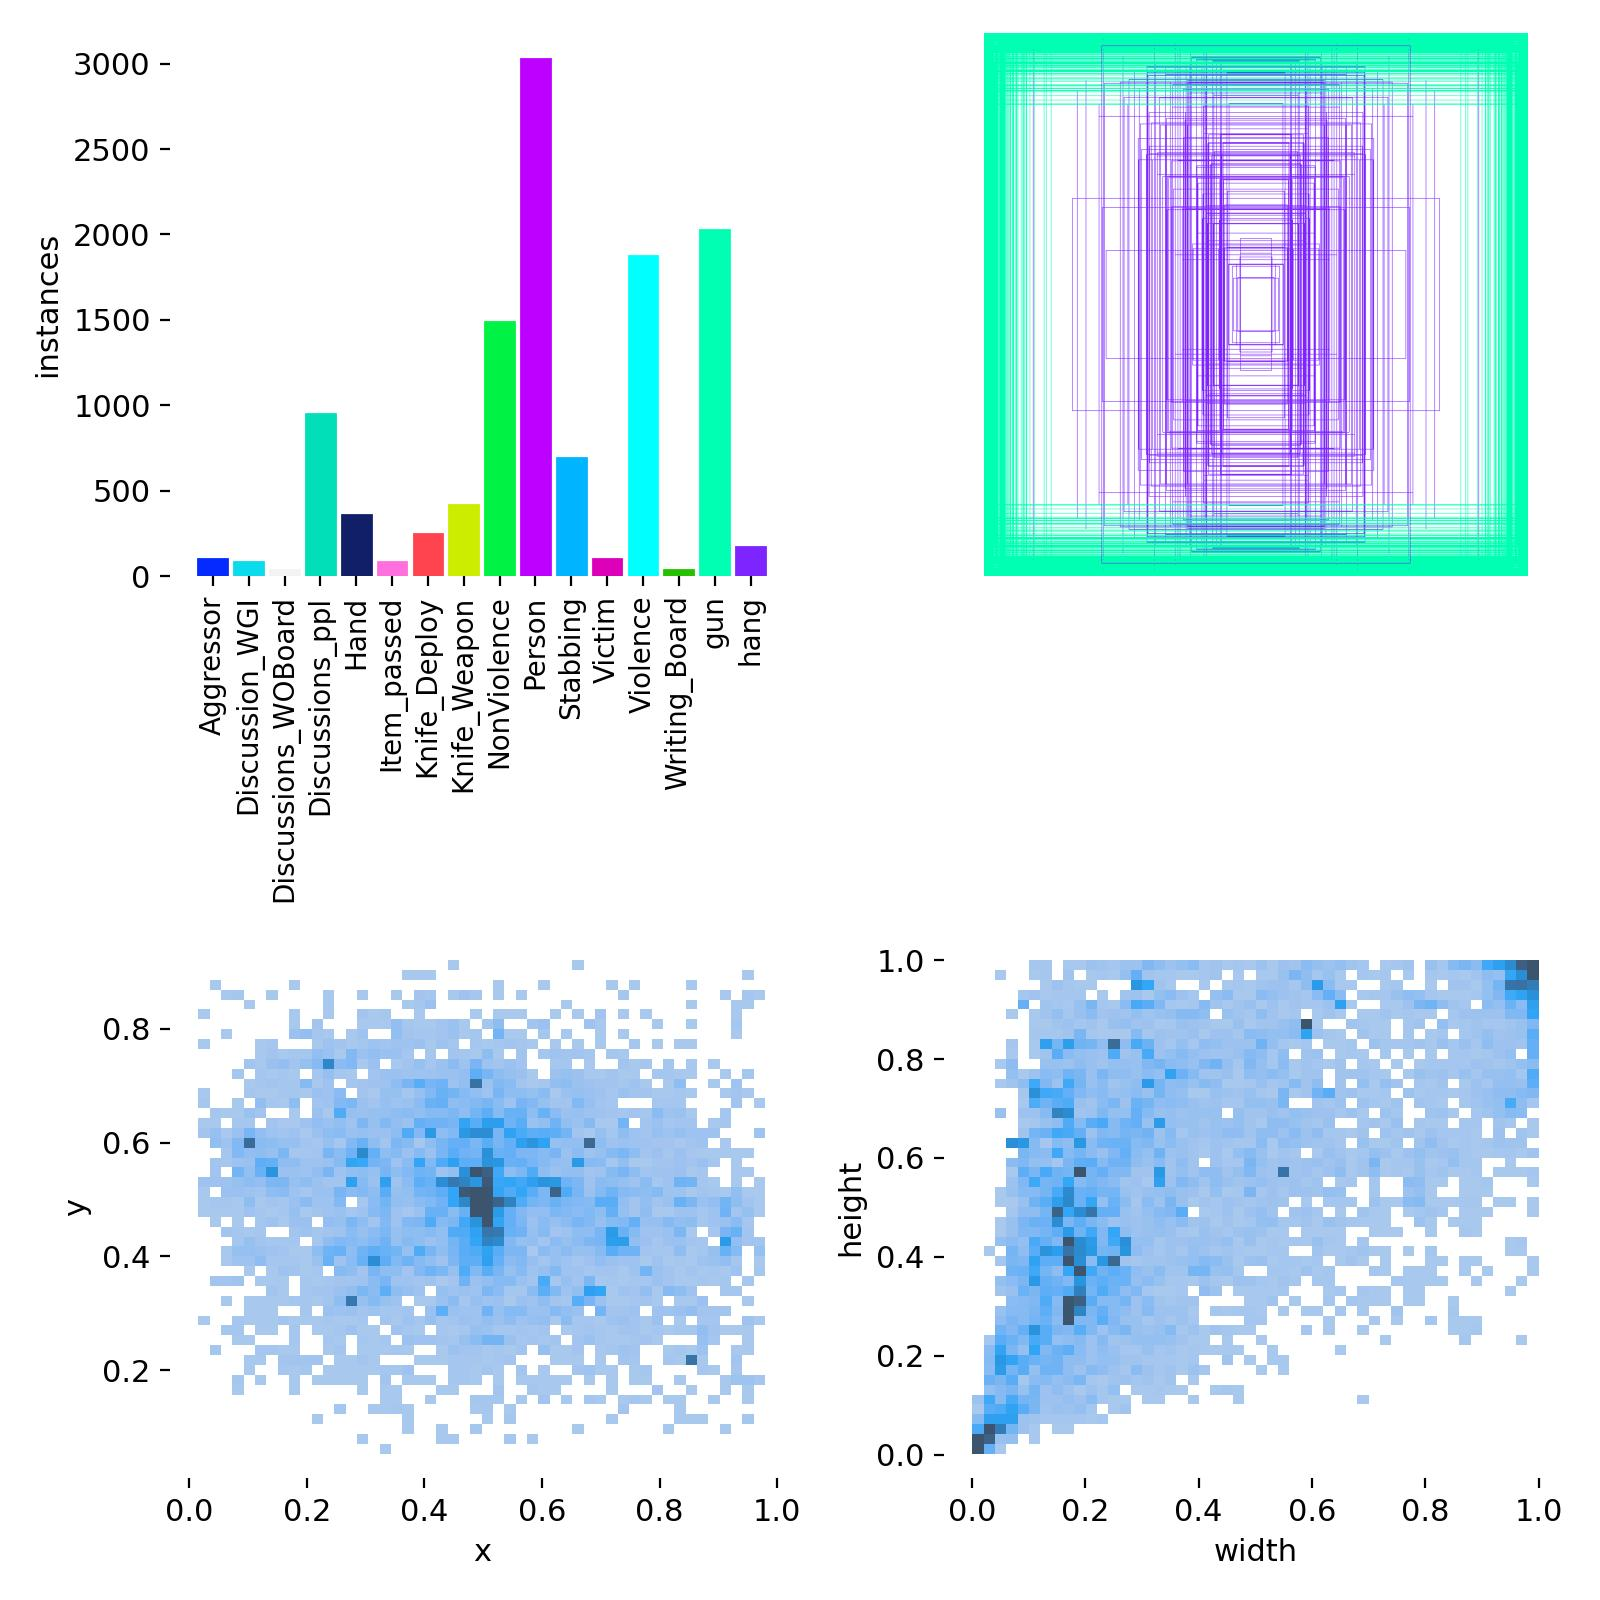

In [ ]:
Image("/content/runs/detect/train/labels.jpg",width=600)

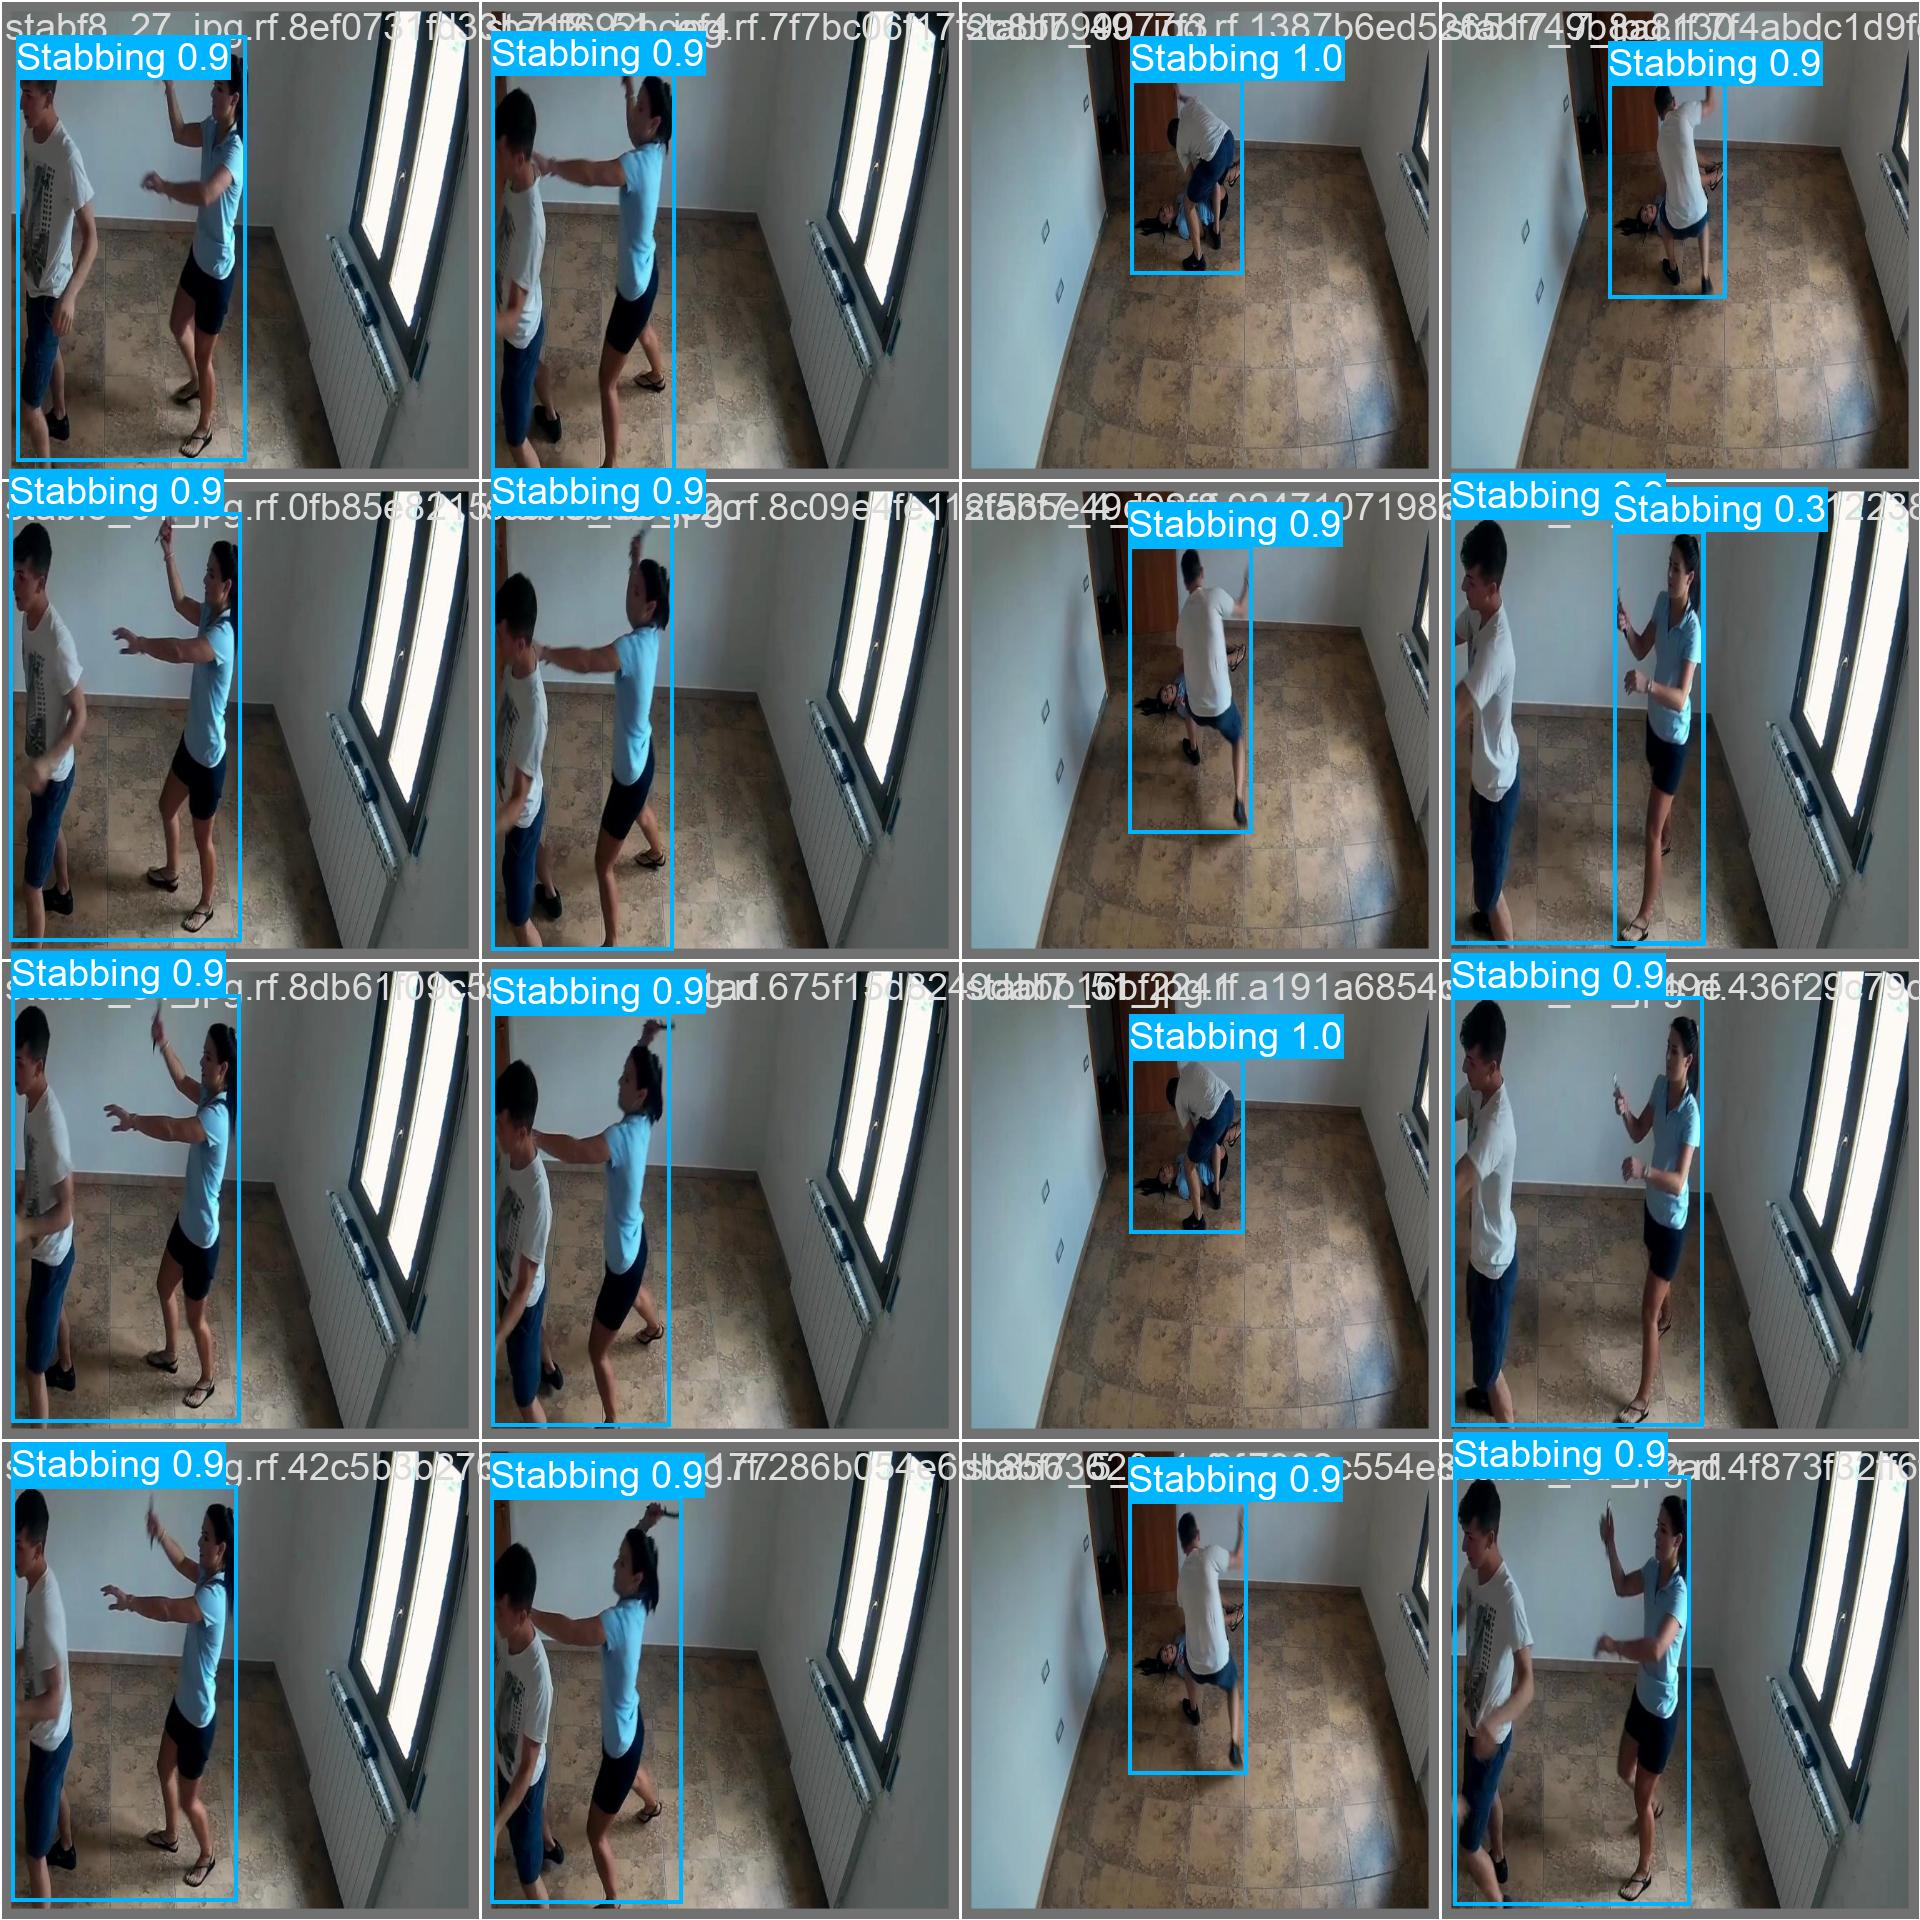

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg",width=600)

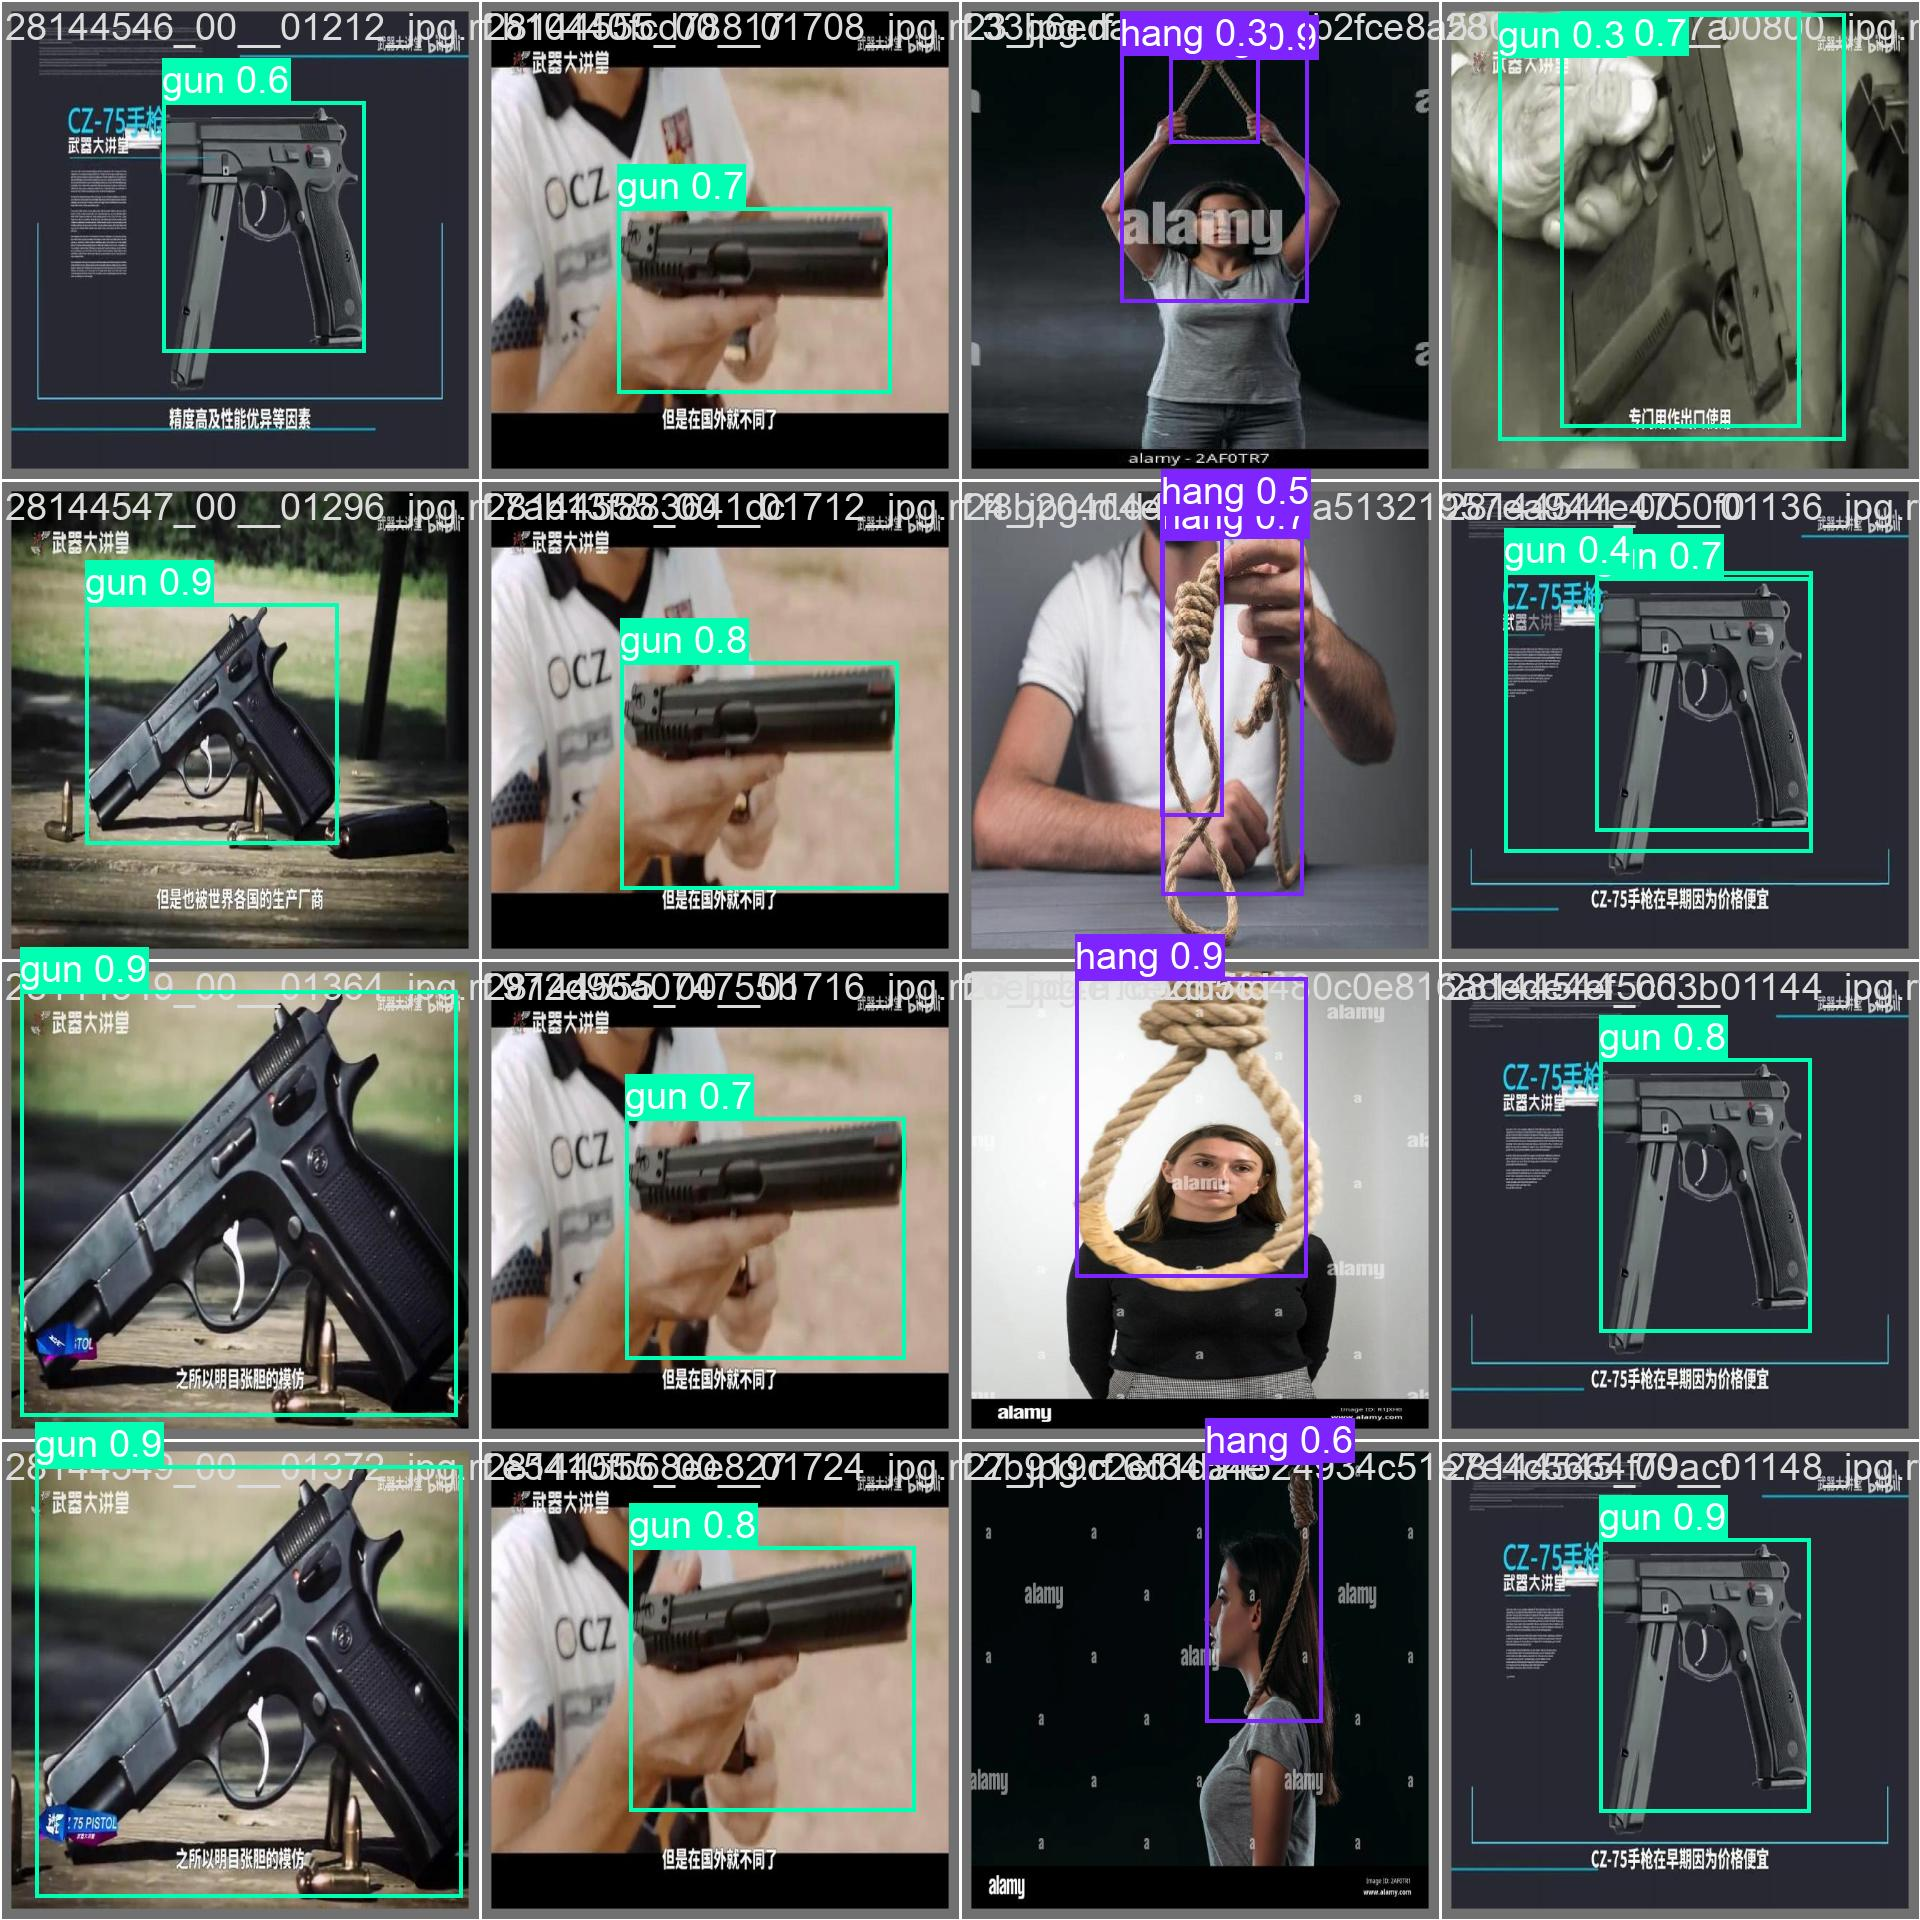

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg",width=600)

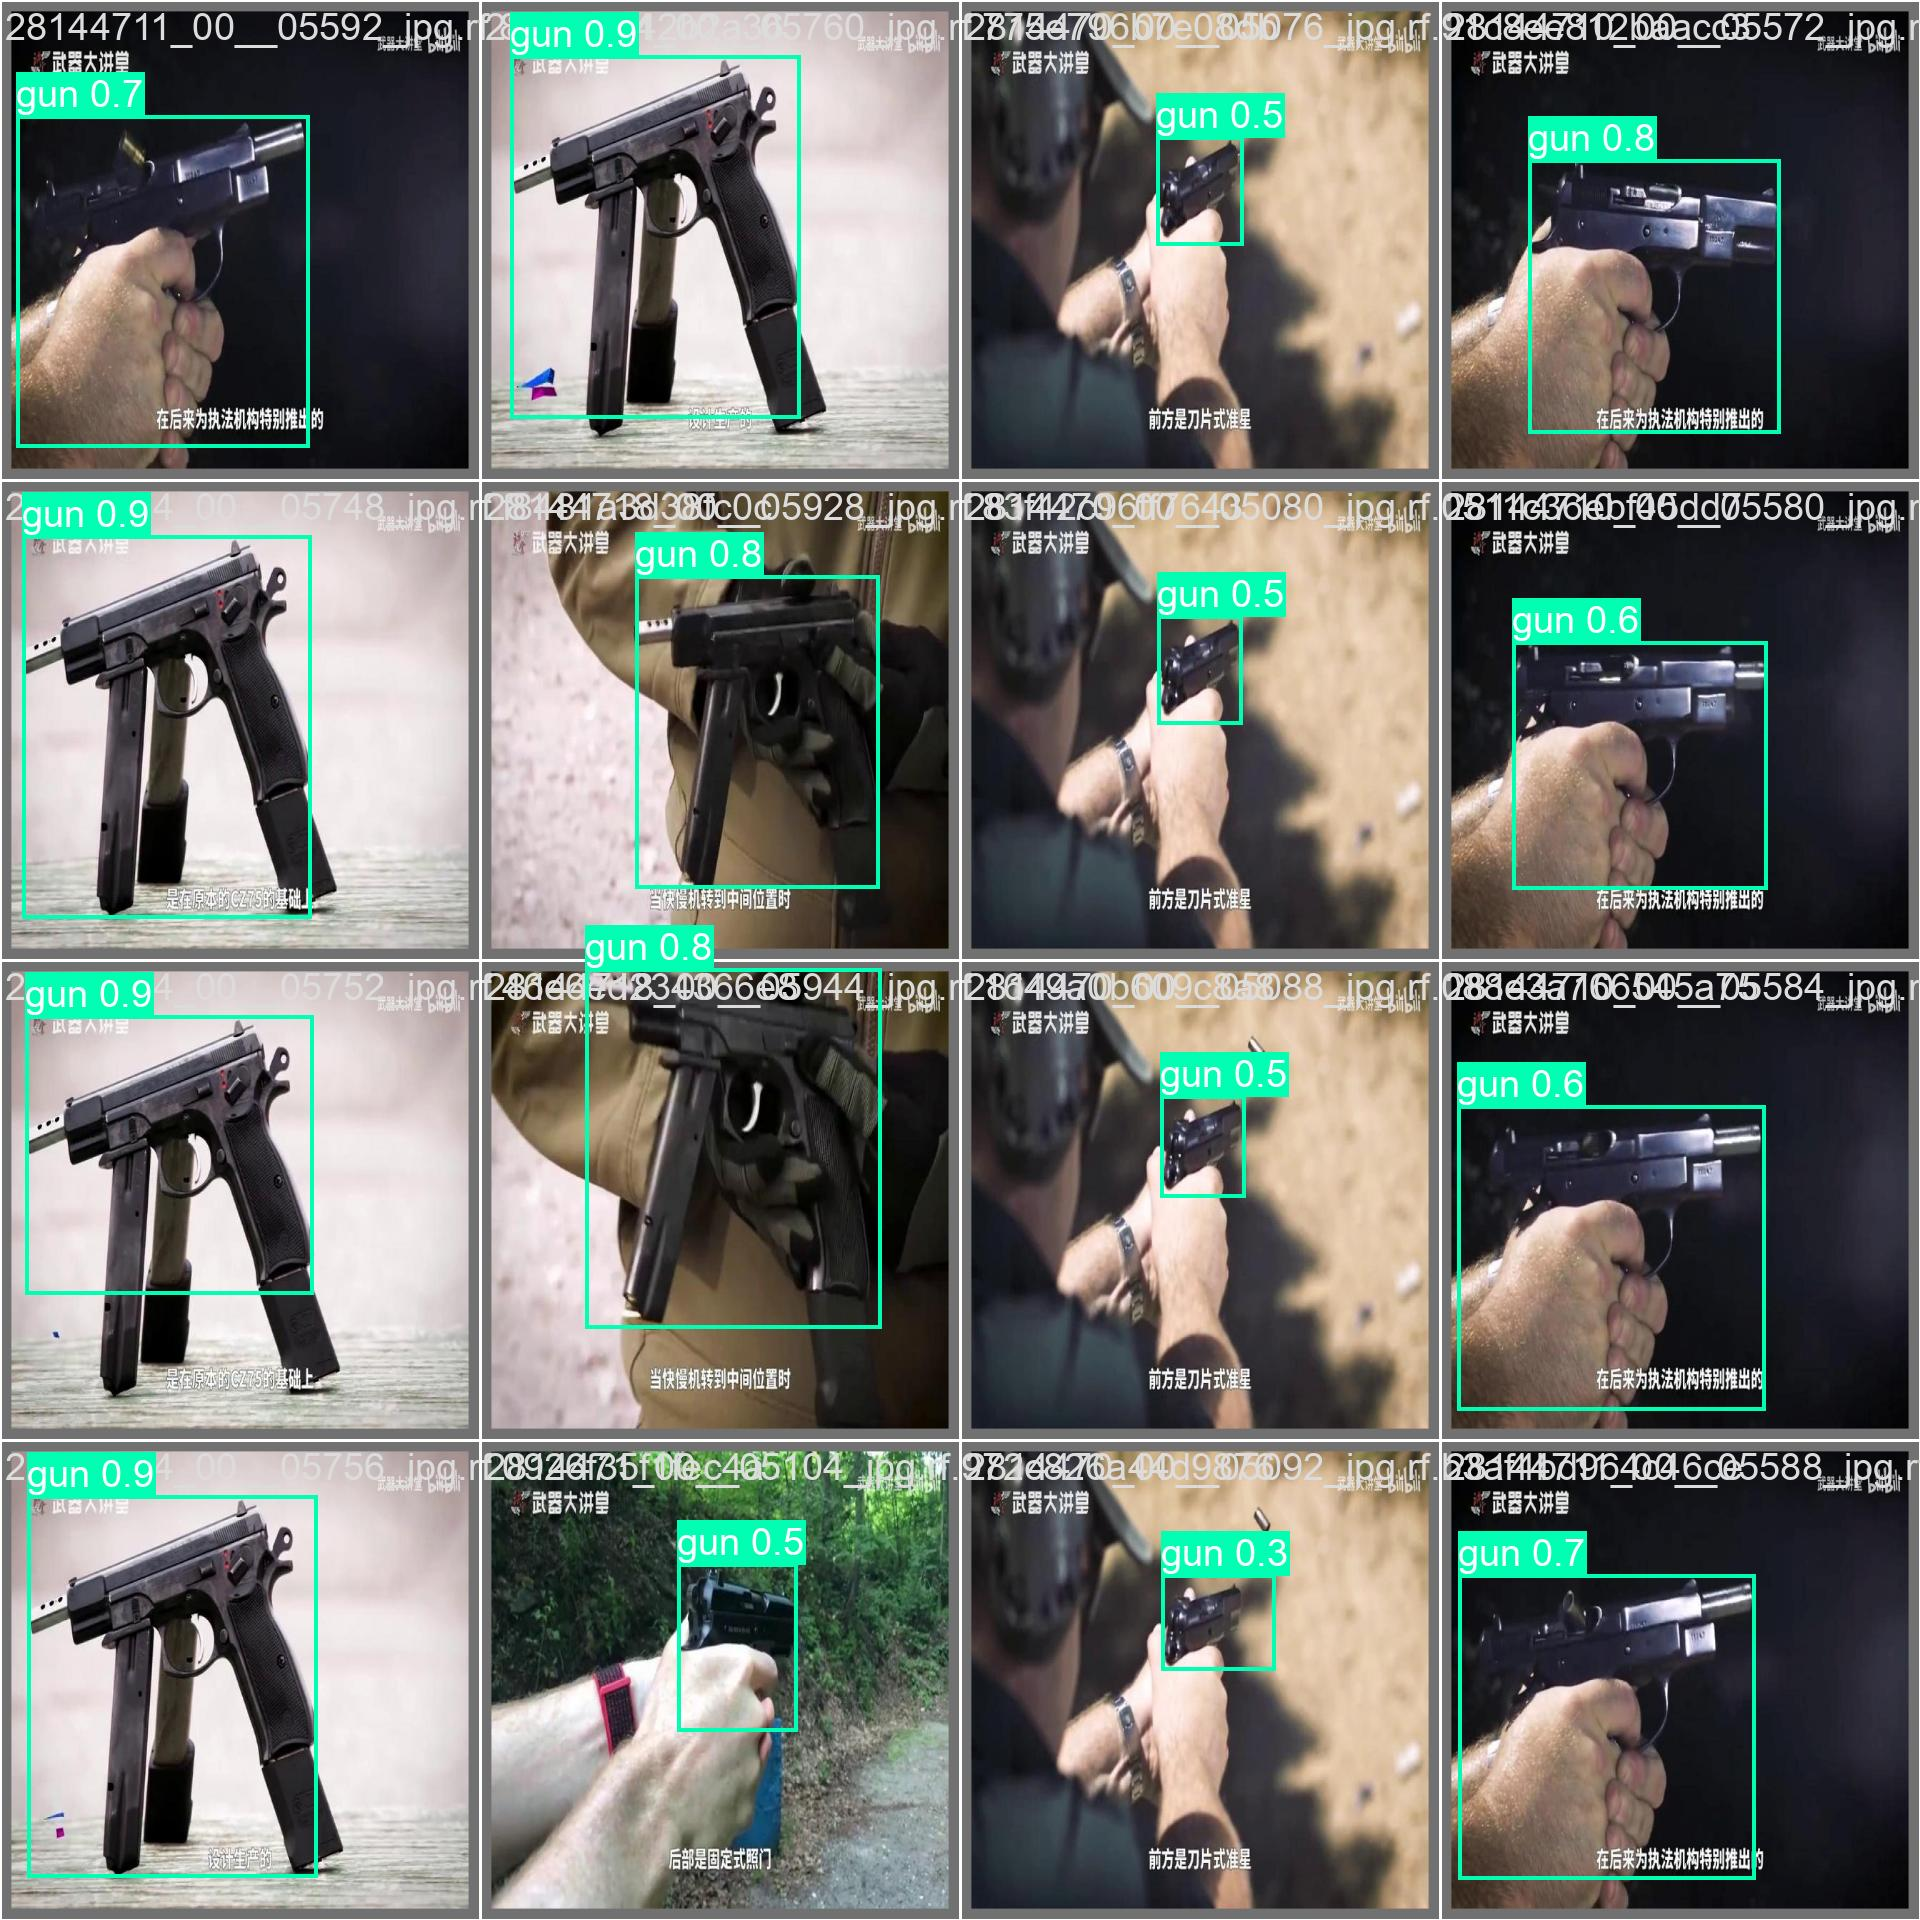

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg",width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Abnormal-Activities-1/valid/labels.cache... 2061 images, 143 backgrounds, 0 corrupt: 100% 2061/2061 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 129/129 [00:50<00:00,  2.58it/s]
                   all       2061       3641      0.811      0.723      0.808      0.632
             Aggressor         27         27      0.858      0.446      0.695      0.537
        Discussion_WGI         35         35      0.961      0.971      0.991      0.945
   Discussions_WOBoard         17         17      0.948          1      0.995      0.965
       Discussions_ppl        201        247      0.916       0.88      0.951      0.901
                  Hand         54         56      0.522      0.411      0.379      0.249
           Item_passed         35

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.75 source={dataset.location}/test/images save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/1264 /content/Abnormal-Activities-1/test/images/10_jpg.rf.79c0595046cbb28fd1e601a8cd3edb0e.jpg: 640x640 1 hang, 37.1ms
image 2/1264 /content/Abnormal-Activities-1/test/images/15_jpg.rf.aa14a06af677402bf82f3e5b0883d7dc.jpg: 640x640 1 hang, 37.1ms
image 3/1264 /content/Abnormal-Activities-1/test/images/17_jpg.rf.8dde21c088bbee27289b8cb1642588b4.jpg: 640x640 1 hang, 37.0ms
image 4/1264 /content/Abnormal-Activities-1/test/images/1_jpg.rf.f7c8e377093882fcbec3d26c8c5dd112.jpg: 640x640 (no detections), 35.4ms
image 5/1264 /content/Abnormal-Activities-1/test/images/29_jpg.rf.e5201798e61ecb56cccce0f90796875e.jpg: 640x640 1 hang, 32.2ms
image 6/1264 /content/Abnormal-Activities-1/test/images/2bjhp9p_jpg.rf.21ba9d93815edf60871c07c4814bccbf.jpg: 640x640 1 hang, 32.1ms
image 7/1264 /content/Abnormal-Activities-1/test/images/31_

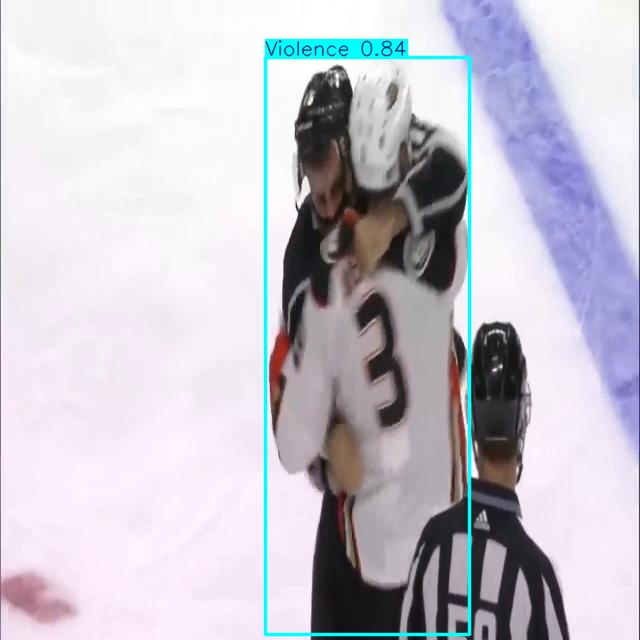

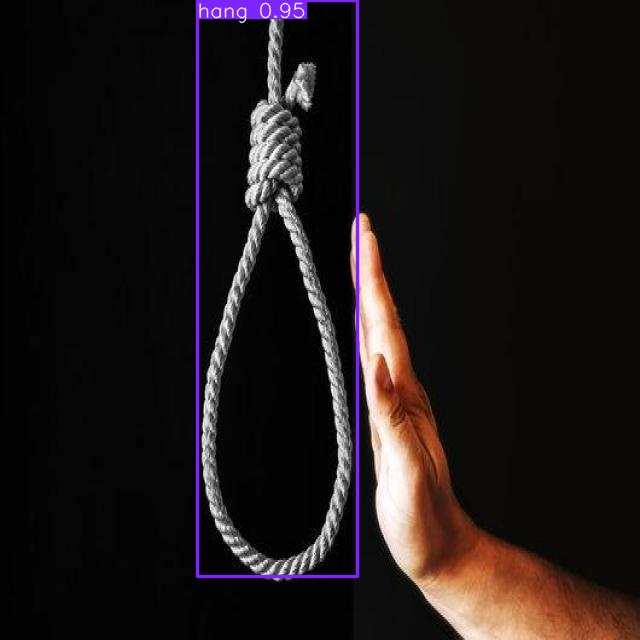

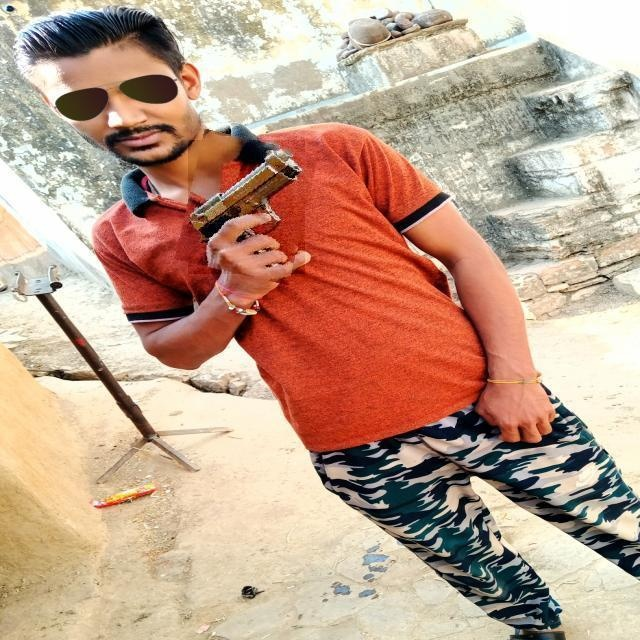

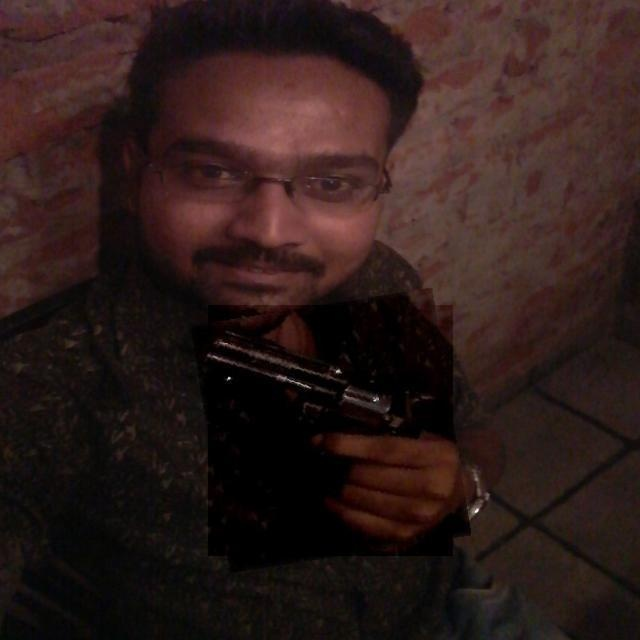

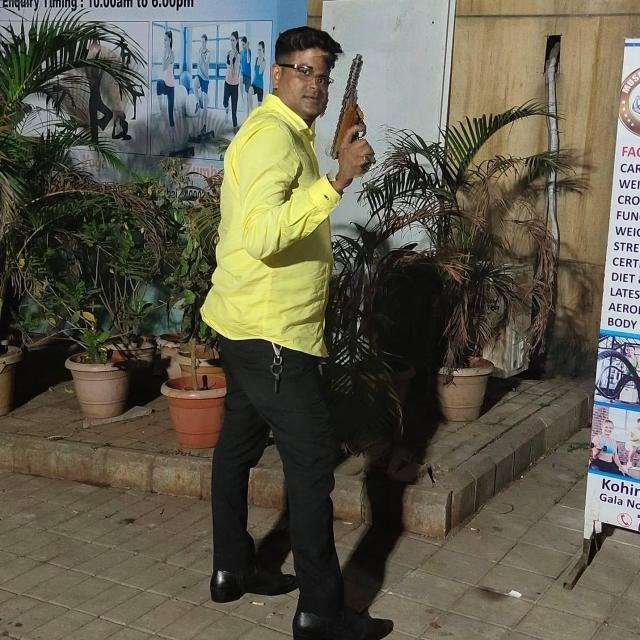

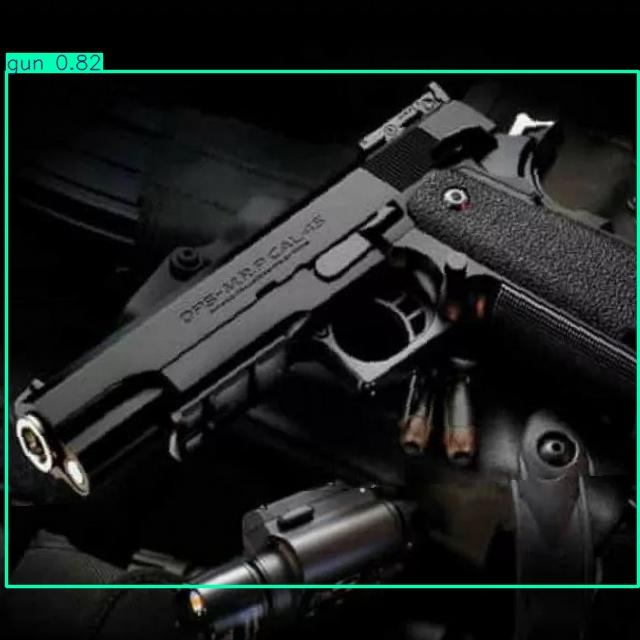

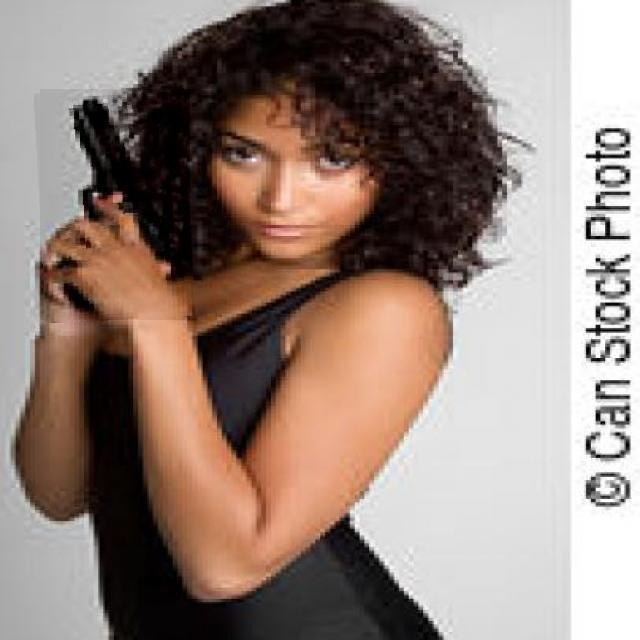

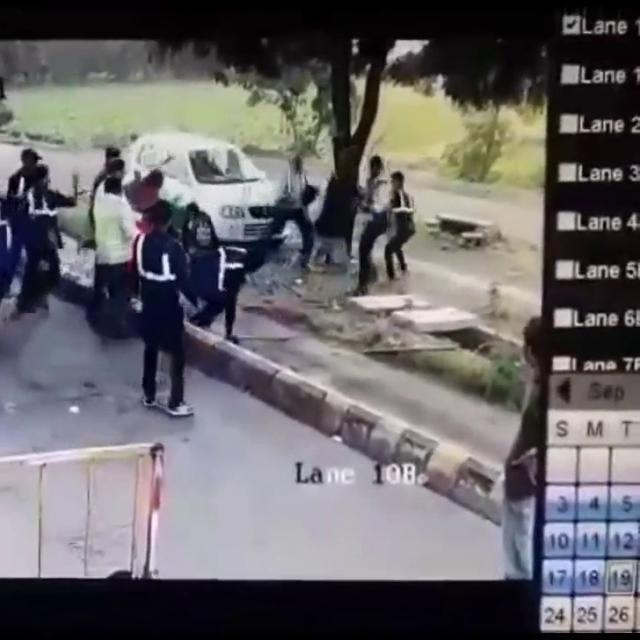

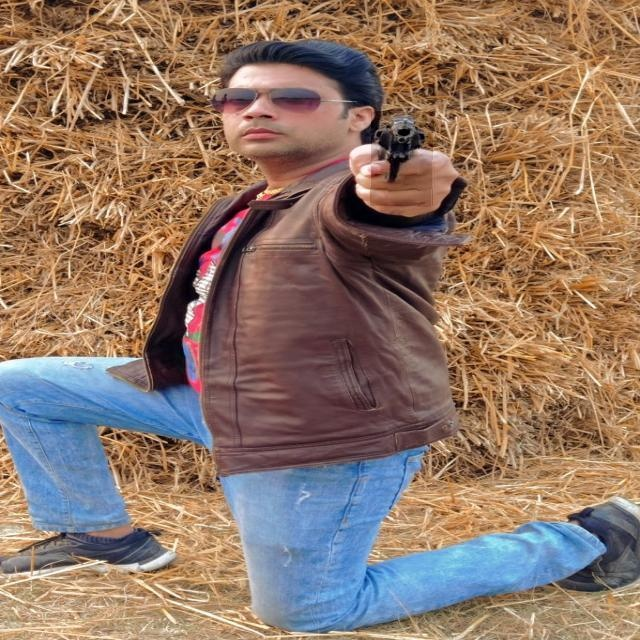

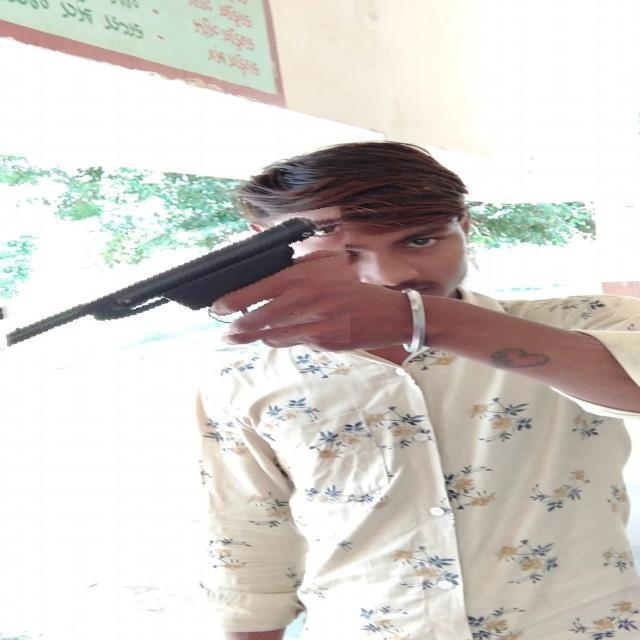

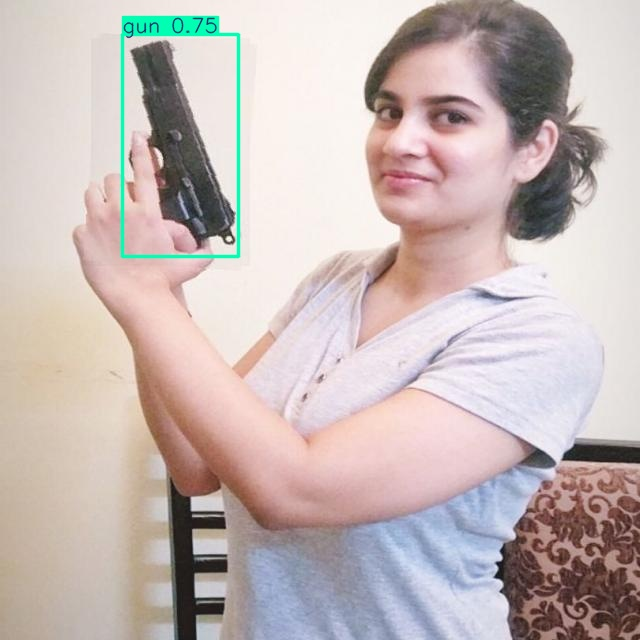

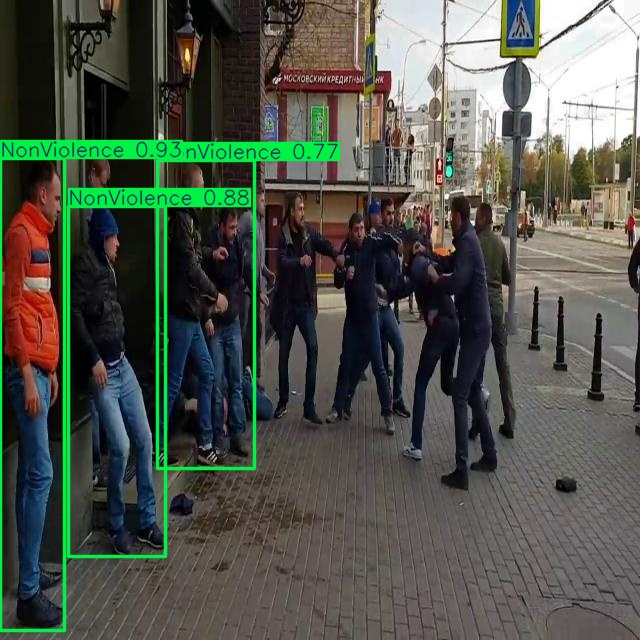

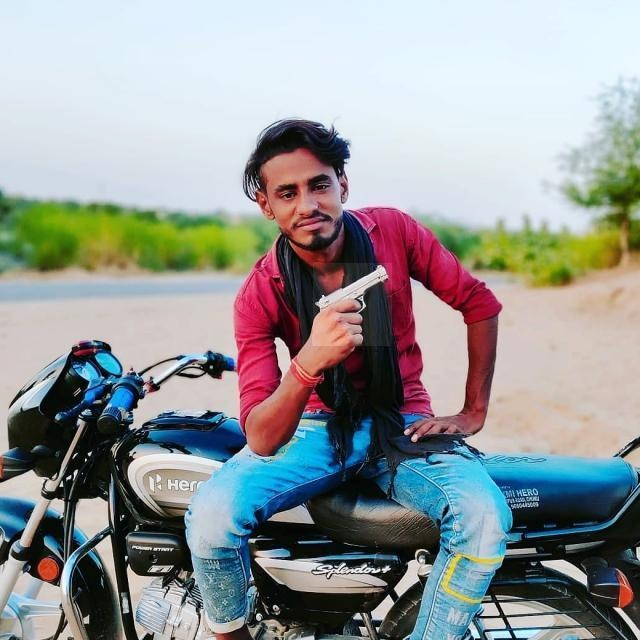

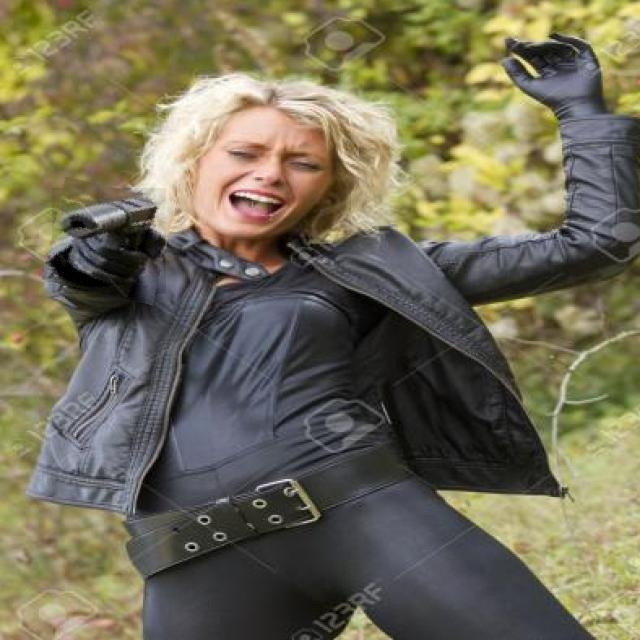

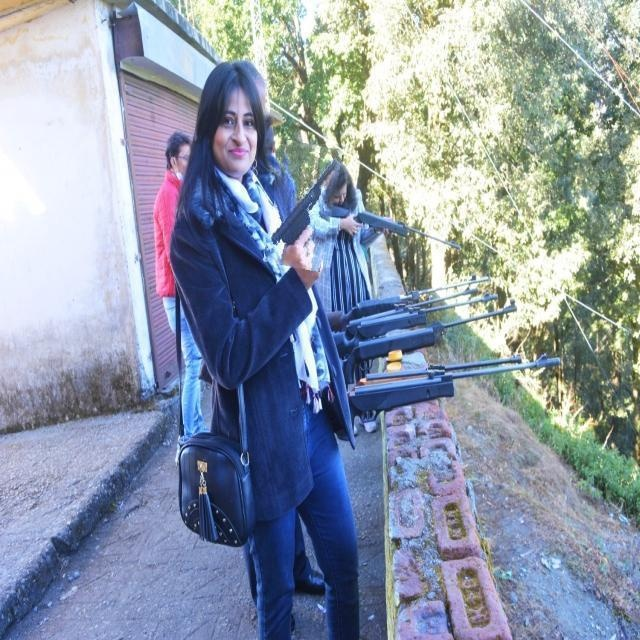

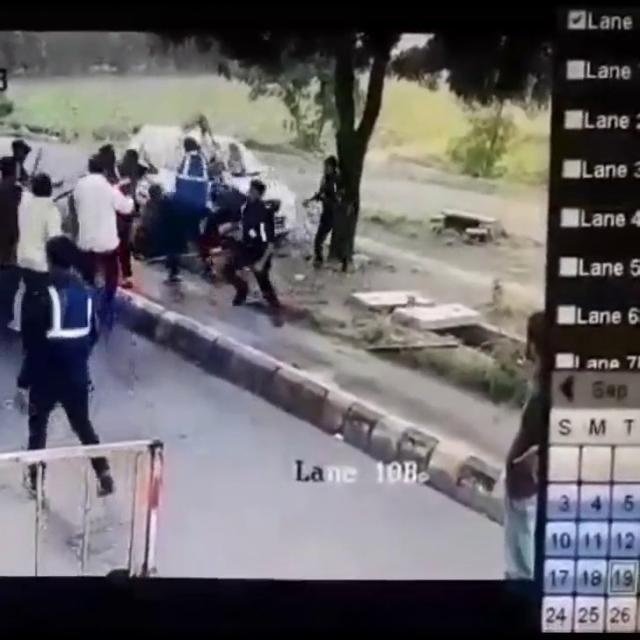

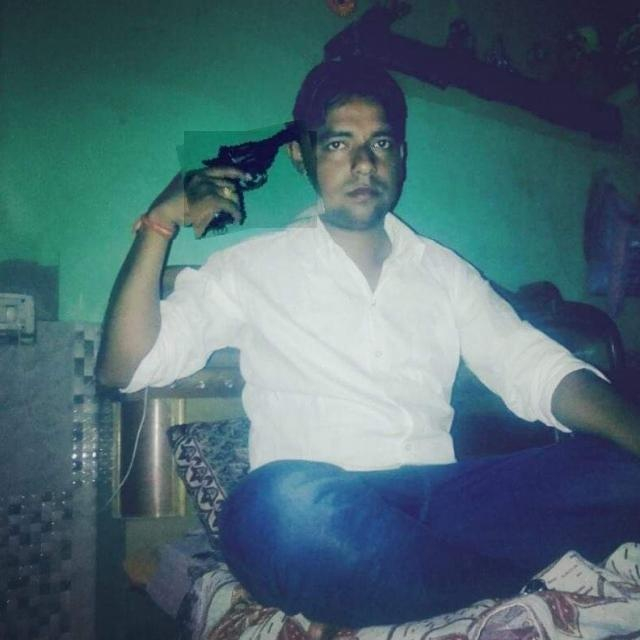

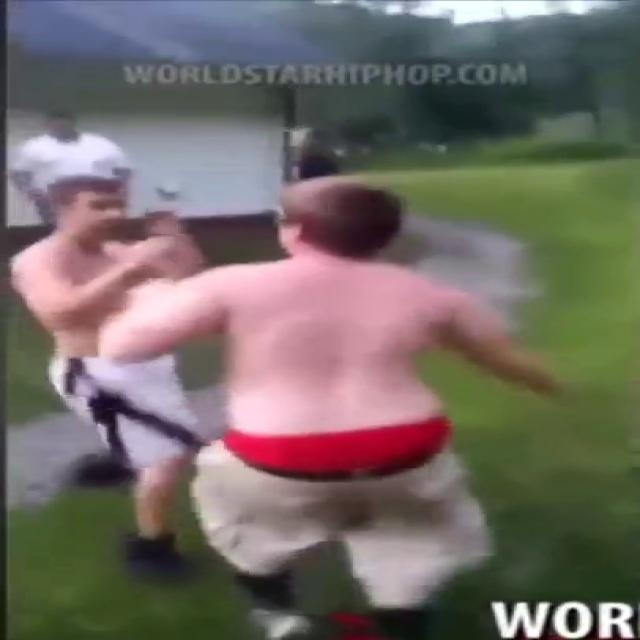

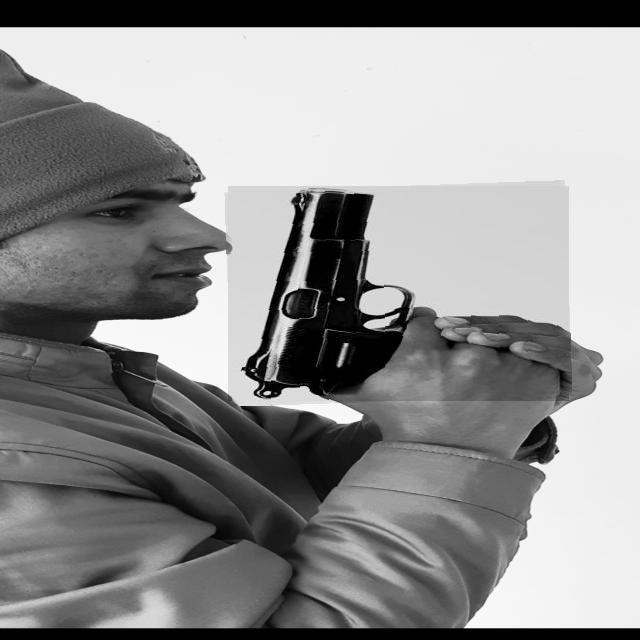

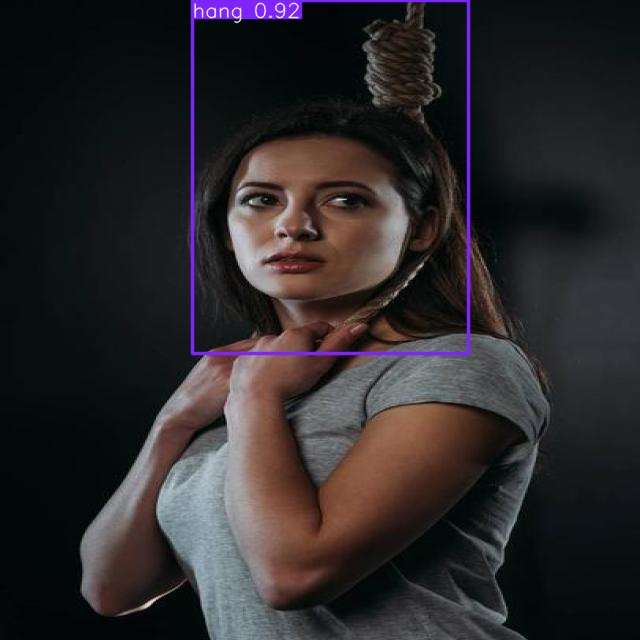

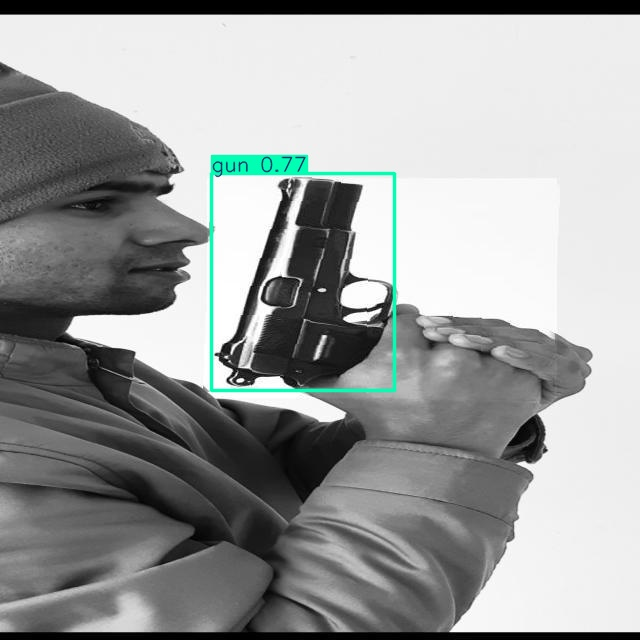

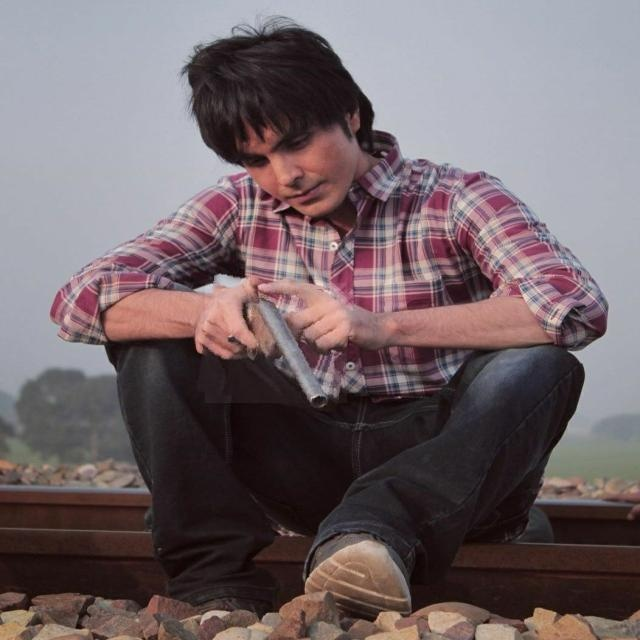

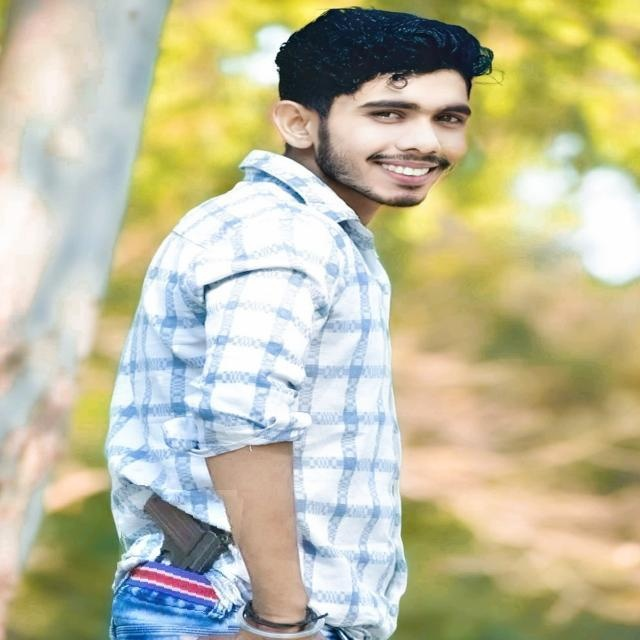

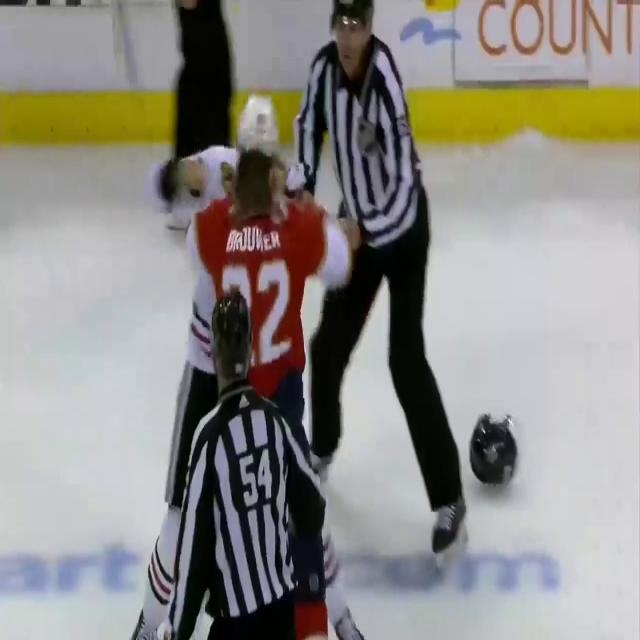

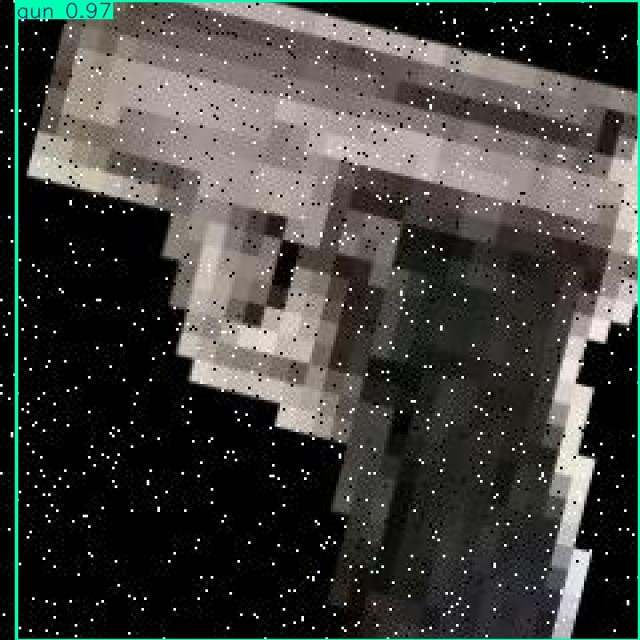

In [ ]:
import glob
import os
from IPython.display import Image,display

for image_path in glob.glob("/content/runs/detect/predict/*.jpg")[:25]:
  display(Image(filename=image_path,width=600))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/last.pt" conf=0.75 source="/content/Env_1_out_2X3_mp4-1_jpg.rf.edeabb54d92415b91ddbe6a63a41c85d.jpg" save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/Env_1_out_2X3_mp4-1_jpg.rf.edeabb54d92415b91ddbe6a63a41c85d.jpg: 640x640 1 Violence, 37.1ms
Speed: 2.8ms preprocess, 37.1ms inference, 564.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/last.pt" conf=0.75 source="/content/4761809-uhd_4096_2160_25fps.mp4" save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 63.4ms
video 1/1 (frame 2/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 3/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 4/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 5/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 6/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 7/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 8/395) /content/4761809-uhd_4096_2160_25fps.mp4: 352x640 (no detections), 25.0ms
video 1/1 (frame 9/395) /content/4761809-uhd_4096_

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.75 source="/content/fig1.jpeg" save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/fig1.jpeg: 480x640 1 Violence, 59.8ms
Speed: 3.0ms preprocess, 59.8ms inference, 534.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/last.pt" conf=0.75 source="/content/fig2.mp4" save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/102) /content/fig2.mp4: 384x640 (no detections), 92.4ms
video 1/1 (frame 2/102) /content/fig2.mp4: 384x640 (no detections), 25.9ms
video 1/1 (frame 3/102) /content/fig2.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 4/102) /content/fig2.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 5/102) /content/fig2.mp4: 384x640 (no detections), 25.2ms
video 1/1 (frame 6/102) /content/fig2.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 7/102) /content/fig2.mp4: 384x640 (no detections), 18.6ms
video 1/1 (frame 8/102) /content/fig2.mp4: 384x640 (no detections), 17.2ms
video 1/1 (frame 9/102) /content/fig2.mp4: 384x640 (no detections), 17.2ms
video 1/1 (frame 10/102) /content/fig2.mp4: 384x640 (no detections), 17.2ms
video 1/1 (frame 11/102) /content/fig2.mp4: 384x640 (no detections), 17.2ms
video 1

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.75 source="/content/fig3.mp4" save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/558) /content/fig3.mp4: 384x640 (no detections), 63.0ms
video 1/1 (frame 2/558) /content/fig3.mp4: 384x640 (no detections), 25.5ms
video 1/1 (frame 3/558) /content/fig3.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 4/558) /content/fig3.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 5/558) /content/fig3.mp4: 384x640 (no detections), 20.9ms
video 1/1 (frame 6/558) /content/fig3.mp4: 384x640 (no detections), 20.7ms
video 1/1 (frame 7/558) /content/fig3.mp4: 384x640 (no detections), 20.6ms
video 1/1 (frame 8/558) /content/fig3.mp4: 384x640 (no detections), 20.6ms
video 1/1 (frame 9/558) /content/fig3.mp4: 384x640 (no detections), 20.6ms
video 1/1 (frame 10/558) /content/fig3.mp4: 384x640 (no detections), 20.6ms
video 1/1 (frame 11/558) /content/fig3.mp4: 384x640 (no detections), 20.6ms
video 1